Digite o lado direito da EDO dy/dx = f(x, y) (ex: y - x**2 + 1):
f(x, y) = x**4-5
Digite y0 (condição inicial): 1
Digite x0 (início do intervalo): 0
Digite x_final (fim do intervalo): 4
Digite os valores de h separados por vírgula (ex: 0.2, 0.1, 0.05): 0.5

✅ Solução simbólica da EDO encontrada:
y(x) = x**5/5 - 5*x + 1.0

📊 Resultados para Euler com h=0.5:
         x  y_numérico    y_exato  Erro absoluto  Erro relativo (%)
0 0.000000    1.000000   1.000000       0.000000           0.000000
1 0.500000   -1.500000  -1.493750       0.006250           0.418410
2 1.000000   -3.968750  -3.800000       0.168750           4.440789
3 1.500000   -5.968750  -4.981250       0.987500          19.824341
4 2.000000   -5.937500  -2.600000       3.337500         128.365385
5 2.500000   -0.437500   8.031250       8.468750         105.447471
6 3.000000   16.593750  34.600000      18.006250          52.041185
7 3.500000   54.593750  88.543750      33.950000          38.342627
8 4.000000  127.125000 185.80

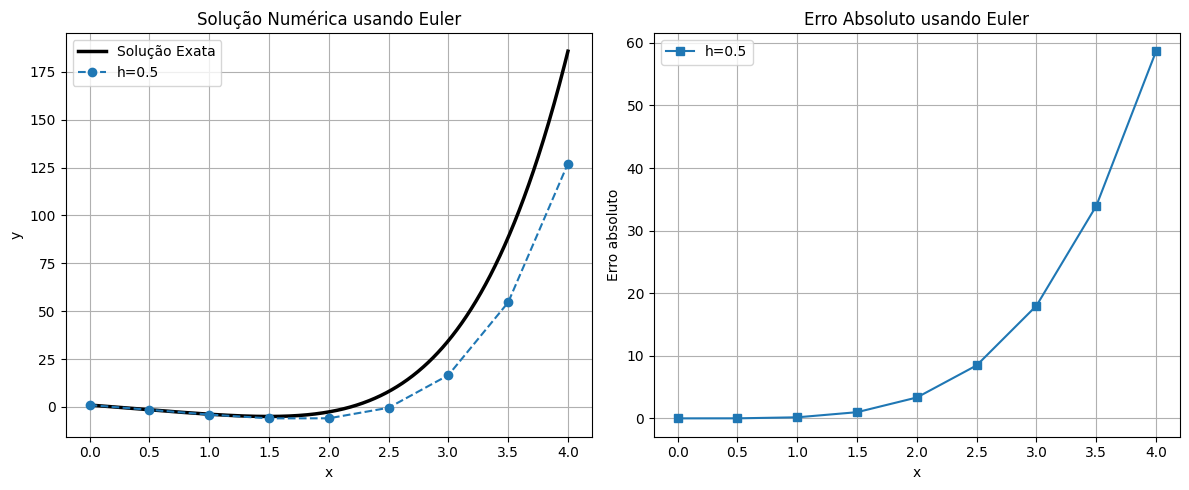


📊 Resultados para Heun com h=0.5:
         x  y_numérico    y_exato  Erro absoluto  Erro relativo (%)
0 0.000000    1.000000   1.000000       0.000000           0.000000
1 0.500000   -1.484375  -1.493750       0.009375           0.627615
2 1.000000   -3.718750  -3.800000       0.081250           2.138158
3 1.500000   -4.703125  -4.981250       0.278125           5.583438
4 2.000000   -1.937500  -2.600000       0.662500          25.480769
5 2.500000    9.328125   8.031250       1.296875          16.147860
6 3.000000   36.843750  34.600000       2.243750           6.484827
7 3.500000   92.109375  88.543750       3.565625           4.026964
8 4.000000  191.125000 185.800000       5.325000           2.865985


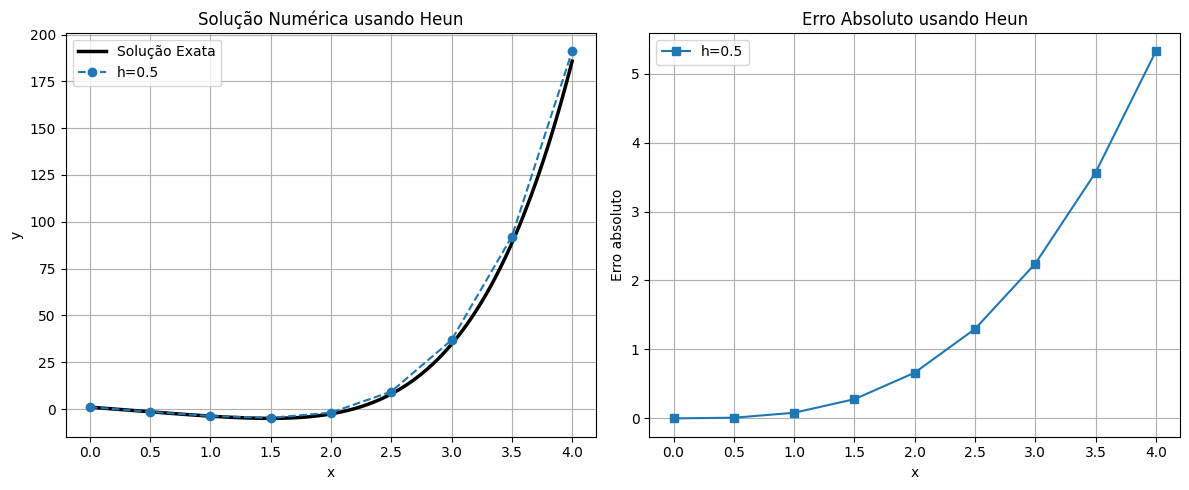


📊 Resultados para RK2 com h=0.5:
         x  y_numérico    y_exato  Erro absoluto  Erro relativo (%)
0 0.000000    1.000000   1.000000       0.000000           0.000000
1 0.500000   -1.498047  -1.493750       0.004297           0.287657
2 1.000000   -3.839844  -3.800000       0.039844           1.048520
3 1.500000   -5.119141  -4.981250       0.137891           2.768193
4 2.000000   -2.929688  -2.600000       0.329688          12.680288
5 2.500000    7.384766   8.031250       0.646484           8.049611
6 3.000000   33.480469  34.600000       1.119531           3.235639
7 3.500000   86.763672  88.543750       1.780078           2.010394
8 4.000000  183.140625 185.800000       2.659375           1.431311


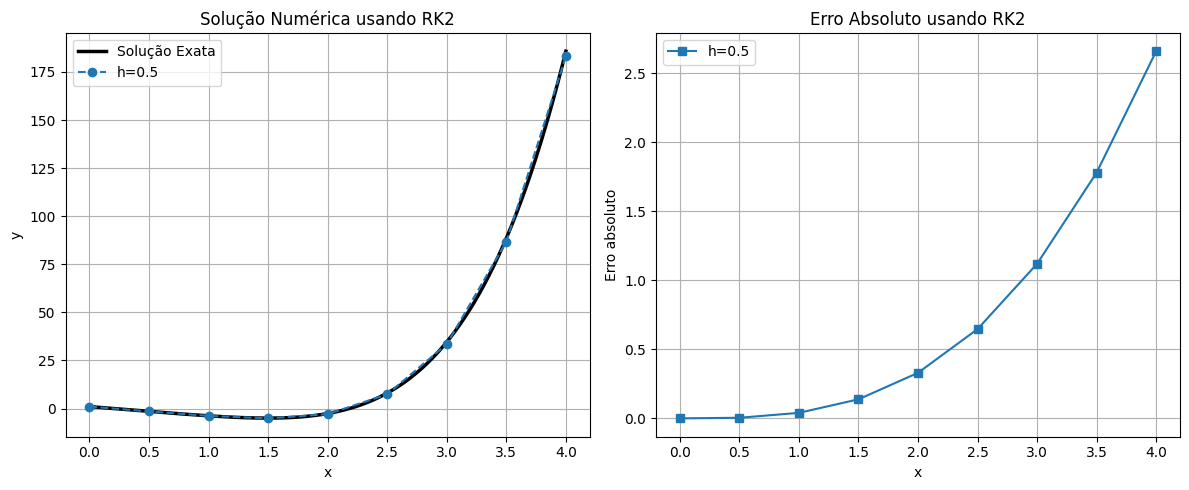


📊 Resultados para RK4 com h=0.5:
         x  y_numérico    y_exato  Erro absoluto  Erro relativo (%)
0 0.000000    1.000000   1.000000       0.000000           0.000000
1 0.500000   -1.493490  -1.493750       0.000260           0.017434
2 1.000000   -3.799479  -3.800000       0.000521           0.013706
3 1.500000   -4.980469  -4.981250       0.000781           0.015684
4 2.000000   -2.598958  -2.600000       0.001042           0.040064
5 2.500000    8.032552   8.031250       0.001302           0.016213
6 3.000000   34.601562  34.600000       0.001562           0.004516
7 3.500000   88.545573  88.543750       0.001823           0.002059
8 4.000000  185.802083 185.800000       0.002083           0.001121


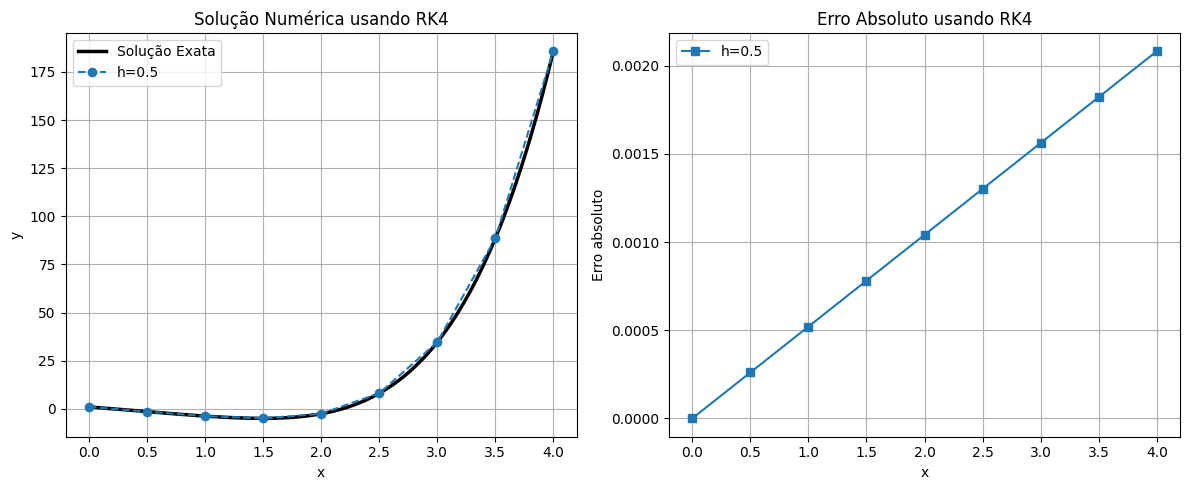

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sympy import symbols, Function, Eq, dsolve, lambdify, simplify
from sympy.abc import x as sym_x

# ----------------------------
# Métodos Numéricos
# ----------------------------
def metodo_euler(f, y0, x0, x_final, h):
    x_values = np.arange(x0, x_final + h, h)
    y_values = [y0]
    for i in range(1, len(x_values)):
        x = x_values[i - 1]
        y = y_values[-1]
        y_new = y + h * f(x, y)
        y_values.append(y_new)
    return x_values, np.array(y_values)

def metodo_heun(f, y0, x0, x_final, h):
    x_values = np.arange(x0, x_final + h, h)
    y_values = [y0]
    for i in range(1, len(x_values)):
        x = x_values[i - 1]
        y = y_values[-1]
        k1 = f(x, y)
        k2 = f(x + h, y + h * k1)
        y_new = y + (h / 2) * (k1 + k2)
        y_values.append(y_new)
    return x_values, np.array(y_values)

def metodo_rk2(f, y0, x0, x_final, h):  # Método do ponto médio
    x_values = np.arange(x0, x_final + h, h)
    y_values = [y0]
    for i in range(1, len(x_values)):
        x = x_values[i - 1]
        y = y_values[-1]
        k1 = f(x, y)
        k2 = f(x + h/2, y + (h/2)*k1)
        y_new = y + h * k2
        y_values.append(y_new)
    return x_values, np.array(y_values)

def metodo_rk4(f, y0, x0, x_final, h):
    x_values = np.arange(x0, x_final + h, h)
    y_values = [y0]
    for i in range(1, len(x_values)):
        x = x_values[i - 1]
        y = y_values[-1]
        k1 = f(x, y)
        k2 = f(x + h / 2, y + (h / 2) * k1)
        k3 = f(x + h / 2, y + (h / 2) * k2)
        k4 = f(x + h, y + h * k3)
        y_new = y + (h / 6) * (k1 + 2*k2 + 2*k3 + k4)
        y_values.append(y_new)
    return x_values, np.array(y_values)

# ----------------------------
# Resolução simbólica
# ----------------------------
def resolver_edo_simbolicamente(expr_rhs, y0, x0):
    x = symbols('x')
    y = Function('y')(x)
    dydx = y.diff(x)
    eq = Eq(dydx, expr_rhs)
    sol = dsolve(eq, y, ics={y.subs(x, x0): y0})
    return sol

# ----------------------------
# Entrada do usuário
# ----------------------------
def solicitar_edo():
    print("Digite o lado direito da EDO dy/dx = f(x, y) (ex: y - x**2 + 1):")
    edo_input = input("f(x, y) = ")
    return edo_input

def solicitar_parametros():
    y0 = float(input("Digite y0 (condição inicial): "))
    x0 = float(input("Digite x0 (início do intervalo): "))
    x_final = float(input("Digite x_final (fim do intervalo): "))
    h_str = input("Digite os valores de h separados por vírgula (ex: 0.2, 0.1, 0.05): ")
    h_list = [float(val.strip()) for val in h_str.split(',')]
    return y0, x0, x_final, h_list

# ----------------------------
# Execução principal
# ----------------------------
def main():
    edo_input = solicitar_edo()
    y0, x0, x_final, h_list = solicitar_parametros()

    # Resolução simbólica
    x_sym = symbols('x')
    y_sym = Function('y')(x_sym)
    expr_rhs = eval(edo_input, {'x': x_sym, 'y': y_sym, 'np': np})
    solucao_simbolica = resolver_edo_simbolicamente(expr_rhs, y0, x0)

    print("\n✅ Solução simbólica da EDO encontrada:")
    print(f"y(x) = {simplify(solucao_simbolica.rhs)}")

    # Criar função numérica para a solução exata
    y_exata = lambdify(x_sym, solucao_simbolica.rhs, modules=['numpy'])

    # Função numérica para a EDO
    f = eval(f"lambda x, y: {edo_input}")

    metodos = {
        "Euler": metodo_euler,
        "Heun": metodo_heun,
        "RK2": metodo_rk2,
        "RK4": metodo_rk4
    }

    for nome, metodo in metodos.items():
        plt.figure(figsize=(12, 5))

        # Gráfico da solução numérica + exata
        plt.subplot(1, 2, 1)
        x_plot = np.linspace(x0, x_final, 1000)
        y_plot = y_exata(x_plot)
        plt.plot(x_plot, y_plot, label='Solução Exata', color='black', linewidth=2.5)

        # Gráfico do erro absoluto
        plt.subplot(1, 2, 2)

        for h in h_list:
            x_vals, y_num = metodo(f, y0, x0, x_final, h)
            y_exato_vals = y_exata(x_vals)
            erro_abs = np.abs(y_exato_vals - y_num)
            erro_rel = np.abs((y_exato_vals - y_num) / y_exato_vals) * 100

            # Mostrar tabela no terminal
            tabela = pd.DataFrame({
                'x': x_vals,
                'y_numérico': y_num,
                'y_exato': y_exato_vals,
                'Erro absoluto': erro_abs,
                'Erro relativo (%)': erro_rel
            })
            print(f"\n📊 Resultados para {nome} com h={h}:")
            print(tabela)

            # Plot solução numérica
            plt.subplot(1, 2, 1)
            plt.plot(x_vals, y_num, marker='o', linestyle='--', label=f'h={h}')

            # Plot erro absoluto
            plt.subplot(1, 2, 2)
            plt.plot(x_vals, erro_abs, marker='s', linestyle='-', label=f'h={h}')

        # Ajustes finais nos gráficos
        plt.subplot(1, 2, 1)
        plt.title(f'Solução Numérica usando {nome}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid(True)
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.title(f'Erro Absoluto usando {nome}')
        plt.xlabel('x')
        plt.ylabel('Erro absoluto')
        plt.grid(True)
        plt.legend()

        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    main()
